# Traffic optimization modeling

## High level user scenarios 

1. User wants to transfer data from Seattle to Boston with **minimal latency regardless cost**
2. User wants to transfer data from San-Francisco to Montreal with **minimal cost and specified restriction for latency as (not more than)**
3. User wants to transfer data from Denver to Miami with **minimal latency and cost**
4. User want to transfer data according to **SLA** with **minimal cost** 

### Defnition of terms:

1. **Network (graph)** - the set of nodes and edges
2. **Node** - the representation of POP or any entity with inbound\outbound traffic
3. **Edge** - the representation of inbound\otbound traffis with metrics

### Assumptions:

1. Network contains up to 150 nodes
2. Model should be as simple as possible and should be considered as a basic model
3. The model shouldn't have restrictions for number of parameters and should be provided in a general form
4. Model should be able to find optimal solution for multitargets (cost and latency)
5. Model should be able to find optimal solution for one target (cost or latance)

## Data preparation & visualization (in progress)

In [4]:
import pandas as pd
from graphviz import Digraph

In [5]:
dot = Digraph()
dot.node('1')
dot.node('2')
dot.edges(['12'])

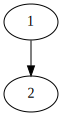

In [6]:
dot

## Modeling 

Lets define **Network** as a graph $G=(V,E)$,
where **Node** $v\in V$ and link $e \in E$.
Lets define function $w(e) \geqslant 0$ (function can be a latency or cost associated with link).
$P$ is a path from source to destination. 

The target function is $w(P)=\sum\limits_{e \in P} w(e)$

The constraint is $\sum\limits_{e \in P} w_r(e) \leqslant W$

It is typical task of Linear Programming. Applying this model to specific case - find a path with minimal latency with restrictions on Cost, number of Hops, Throughput.

$\begin{equation*}
  \begin{cases}
    L(P)=\sum\limits_{e \in P} l(e) \to min,
    \\
    \sum\limits_{e \in P} c(e) \leqslant C     (cost), 
    \\
    \sum\limits_{e \in P} h(e) \leqslant H    (hops),
    \\ 
    max(\sum\limits_{e \in P} t(e)) \leqslant T    (throughput)
\end{cases}
\end{equation*}$

In this formalization the case represents the Transportation problem. Transportation problem is a type of LP task with well known solutions.
As we have number of nodes ~150 we can try to use **modified Dijktra's algorithm** or **Simplex method** (https://www.britannica.com/topic/simplex-method) to find global optimal solution.